# EDA Earthquake o Terremoto

Usando dataset ../../Data/03Limpio/03desastreslimpio.csv

## Objetivo

### Identificar condiciones y patrones relacionadas a terremotos

## Importar librerías

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 40)
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Cargar datos

In [2]:
df = pd.read_csv('../../Data/03Limpio/03desastreslimpio.csv')

# Verificar carga de dataset

##  Resumen básico shape, info, head

In [3]:
df.shape
# Resultado: 16636 filas y 26 columnas)

(16636, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dis No             16636 non-null  object
 1   Year               16636 non-null  int64 
 2   Seq                16636 non-null  int64 
 3   Disaster Subgroup  16636 non-null  object
 4   Disaster Type      16636 non-null  object
 5   Disaster Subtype   13313 non-null  object
 6   Country            16636 non-null  object
 7   ISO                16636 non-null  object
 8   Region             16636 non-null  object
 9   Continent          16636 non-null  object
 10  Location           14825 non-null  object
 11  Origin             4085 non-null   object
 12  Associated Dis     3593 non-null   object
 13  Dis Mag Value      16636 non-null  int64 
 14  Dis Mag Scale      15416 non-null  object
 15  Latitude           2775 non-null   object
 16  Longitude          2775 non-null   objec

In [5]:
df.head(20)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
3,1902-0003-GTM,1902,3,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,4,8,1902,4,8,1000,0,0
4,1902-0010-GTM,1902,10,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,10,24,1902,10,24,6000,0,0
5,1903-0006-CAN,1903,6,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1903,4,29,1903,4,29,76,23,0
6,1903-0012-COM,1903,12,Geophysical,Volcanic activity,Ash fall,Comoros (the),COM,Eastern Africa,Africa,...,NaN,1903,0,0,1903,0,0,17,0,0
7,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11,0,1904,11,0,0,0,0
8,1905-0005-CAN,1905,5,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1905,8,13,1905,8,13,18,18,0
9,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477


## Columns

In [6]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

# Earthquake filter

### Filtro principal para Earthquake
Selecciona solo las filas en el DataFrame donde la columna 'Disaster Type' es 'Earthquake'.

In [7]:
# Filtro principal para Earthquake
earthquake_filter = (df['Disaster Type'] == 'Earthquake')
df_earthquake = df[earthquake_filter]

In [8]:
df_earthquake.head(10)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
9,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477
10,1906-0014-CHL,1906,14,Geophysical,Earthquake,Ground movement,Chile,CHL,South America,Americas,...,71.4,1906,8,16,1906,8,16,20000,0,3249907
11,1906-0002-COL,1906,2,Geophysical,Earthquake,Ground movement,Colombia,COL,South America,Americas,...,-78.46,1906,1,31,1906,1,31,400,0,0
15,1907-0006-CHN,1907,6,Geophysical,Earthquake,Ground movement,China,CHN,Eastern Asia,Asia,...,69.9,1907,10,21,1907,10,21,12000,0,0
21,1909-0009-FRA,1909,9,Geophysical,Earthquake,Ground movement,France,FRA,Western Europe,Europe,...,6.14,1909,6,11,1909,6,11,46,0,0
28,1910-0004-CRI,1910,4,Geophysical,Earthquake,Ground movement,Costa Rica,CRI,Central America,Americas,...,-84,1910,4,13,1910,4,13,1750,0,0
29,1910-0005-DZA,1910,5,Geophysical,Earthquake,Ground movement,Algeria,DZA,Northern Africa,Africa,...,4,1910,6,24,1910,6,24,12,0,0
37,1914-0022-IDN,1914,22,Geophysical,Earthquake,Ground movement,Indonesia,IDN,South-Eastern Asia,Asia,...,101.82,1914,6,26,1914,6,26,20,20,0
42,1917-0014-CHN,1917,14,Geophysical,Earthquake,Ground movement,China,CHN,Eastern Asia,Asia,...,104,1917,7,31,1917,7,31,1800,0,0


## Análisis básico para df_earthquake

In [9]:
df_earthquake.shape

(1597, 26)

In [10]:
df_earthquake.isnull().sum()

Dis No                  0
Year                    0
Seq                     0
Disaster Subgroup       0
Disaster Type           0
Disaster Subtype        0
Country                 0
ISO                     0
Region                  0
Continent               0
Location               40
Origin               1576
Associated Dis       1255
Dis Mag Value           0
Dis Mag Scale           0
Latitude               50
Longitude              50
Start Year              0
Start Month             0
Start Day               0
End Year                0
End Month               0
End Day                 0
Total Deaths            0
Total Affected          0
Total Damages Adj       0
dtype: int64

In [11]:
df_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 2 to 16617
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dis No             1597 non-null   object
 1   Year               1597 non-null   int64 
 2   Seq                1597 non-null   int64 
 3   Disaster Subgroup  1597 non-null   object
 4   Disaster Type      1597 non-null   object
 5   Disaster Subtype   1597 non-null   object
 6   Country            1597 non-null   object
 7   ISO                1597 non-null   object
 8   Region             1597 non-null   object
 9   Continent          1597 non-null   object
 10  Location           1557 non-null   object
 11  Origin             21 non-null     object
 12  Associated Dis     342 non-null    object
 13  Dis Mag Value      1597 non-null   int64 
 14  Dis Mag Scale      1597 non-null   object
 15  Latitude           1547 non-null   object
 16  Longitude          1547 non-null   object

### Categorías de condiciones asociadas al filtro Earthquake: geográficas, magnitud, geolocalización, temporales, etc.

In [12]:
# Categorías geográficas de Earthquake
df_eq_geograph = df_earthquake[['Location', 'ISO', 'Country', 'Region', 'Continent']]

# Categorías de magnitud de Earthquake
df_eq_magnitude = df_earthquake[['Dis Mag Scale', 'Dis Mag Value']]

# Categorías de geolocalización de Earthquake
df_eq_geoloc = df_earthquake[['Latitude', 'Longitude']]

# Categorías de fecha de Earthquake
df_eq_datetime = df_earthquake[['Start Month', 'Start Year', 'End Year', 'End Year']]


## Análisis geográfico de terremotos

In [13]:
df_eq_geograph.head(5)

,Location,ISO,Country,Region,Continent
2,"Quezaltenango, San Marcos",GTM,Guatemala,Central America,Americas
9,Kangra,IND,India,Southern Asia,Asia
10,Valparaiso,CHL,Chile,South America,Americas
11,Tumako,COL,Colombia,South America,Americas
15,Tien Shan,CHN,China,Eastern Asia,Asia


In [14]:
df_eq_geograph.shape # 1597 rows x 5 columns
df_eq_geograph.info

<bound method DataFrame.info of                                                Location  ISO  \
2                             Quezaltenango, San Marcos  GTM   
9                                                Kangra  IND   
10                                           Valparaiso  CHL   
11                                               Tumako  COL   
15                                            Tien Shan  CHN   
...                                                 ...  ...   
16610                                               NaN  SYR   
16611                                         Northwest  SYR   
16614                                    Sughd province  TJK   
16616  Defne District (Hatay Province, southern Turkey)  TUR   
16617             Yesilyurt District (Malatya province)  TUR   

                    Country           Region Continent  
2                 Guatemala  Central America  Americas  
9                     India    Southern Asia      Asia  
10                    Chile 

### Distribución geográfica de terremotos

In [15]:
df_eq_geograph.isnull().sum()

Location     40
ISO           0
Country       0
Region        0
Continent     0
dtype: int64

#### Value counts: Contar ocurrencias de terremotos en diferentes localizaciones, países, regiones y continentes


#### Continent

In [16]:
continent_counts = df_eq_geograph['Continent'].value_counts()
continent_counts

Asia        937
Americas    326
Europe      203
Africa       74
Oceania      57
Name: Continent, dtype: int64

#### Region

In [17]:
region_counts = df_eq_geograph['Region'].value_counts()
region_counts

Eastern Asia                 309
Southern Asia                258
South-Eastern Asia           205
South America                154
Western Asia                 138
Southern Europe              132
Central America              107
Northern America              46
Melanesia                     38
Northern Africa               35
Eastern Europe                29
Central Asia                  27
Eastern Africa                27
Russian Federation            26
Caribbean                     19
Australia and New Zealand     13
Western Europe                11
Northern Europe                5
Polynesia                      5
Middle Africa                  5
Southern Africa                5
Western Africa                 2
Micronesia                     1
Name: Region, dtype: int64

#### Country

In [18]:
country_counts = df_eq_geograph['Country'].value_counts()
country_counts

China                         203
Indonesia                     145
Iran (Islamic Republic of)    137
Turkey                        114
Japan                          70
                             ... 
Turkmenistan                    1
Serbia Montenegro               1
Burundi                         1
Dominica                        1
Wallis and Futuna               1
Name: Country, Length: 125, dtype: int64

#### Location

In [19]:
location_counts = df_eq_geograph['Location'].value_counts()
location_counts

Yunnan province                                                           14
Sichuan province                                                           8
Managua                                                                    4
Tainan                                                                     3
Yingjiang area (Dehong Dai and Jingpo district, Yunnan Sheng province)     3
                                                                          ..
Bangkejeren, Kutacane, Medan area (North Sumatra)                          1
Salima district                                                            1
Near coast of Guerrero                                                     1
Fars,Yasuj, Kohkiluyeh-Boyer Ahmad provinces                               1
Yesilyurt District (Malatya province)                                      1
Name: Location, Length: 1474, dtype: int64

## Visualizar la distribución geográfica de terremotos a partir de value_counts usando bar charts o countplot

### Distribución de terremotos por continente

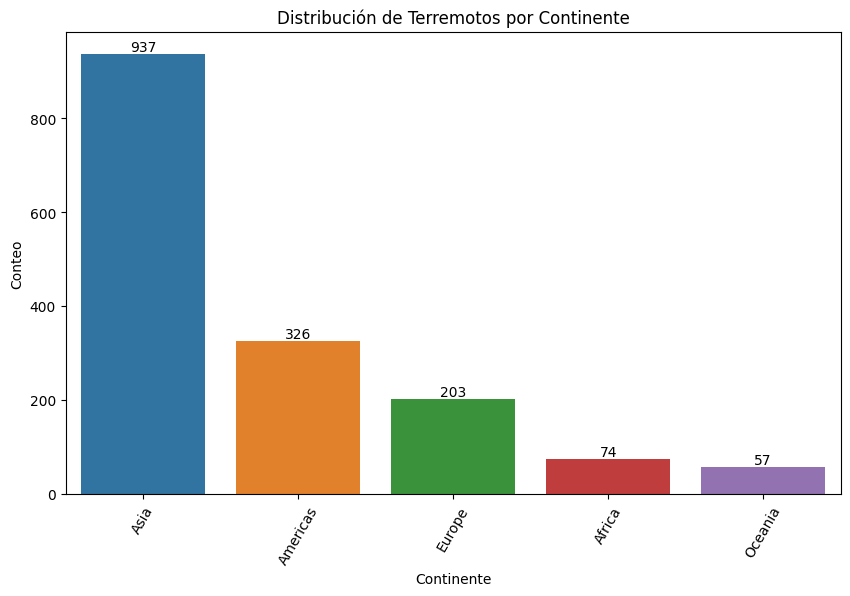

In [20]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=continent_counts.index, y=continent_counts.values)
plt.title('Distribución de Terremotos por Continente')
plt.xlabel('Continente')
plt.ylabel('Conteo')
plt.xticks(rotation=60)
ax.bar_label(ax.containers[0]); 
order = df_eq_geograph['Continent'].value_counts(ascending=False).index
plt.show()

Insights sobre terremotos en continentes: Asia es el continente donde más terremotos ha habido muy por encima del resto: 937. Seguido por América: 326, Europa: 203 y con valores bastante inferiores: África 74 y Oceanía 57.

In [21]:
# Establecer tamaño de fuente a 9
plt.rcParams.update({'font.size': 9})

### Region

#### Distribución de terremotos por región

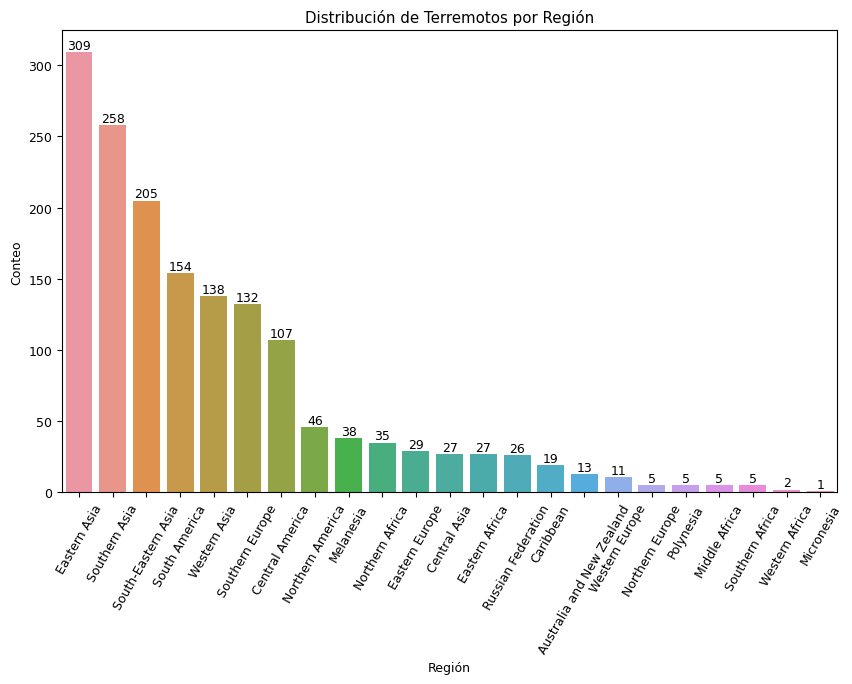

In [22]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Distribución de Terremotos por Región')
plt.xlabel('Región')
plt.ylabel('Conteo')
plt.xticks(rotation=60)
ax.bar_label(ax.containers[0]); 
plt.show()

Insights sobre terremotos en regiones: A excepción de Asia Central, todas las regiones de Asia superan al resto de regiones en cuanto a existencia de terremotos. Eastern Asia es la región con más terremotos.

In [23]:
# Establecer tamaño de fuente a 5
plt.rcParams.update({'font.size': 5})

### Country

#### Distribución de terremotos por país

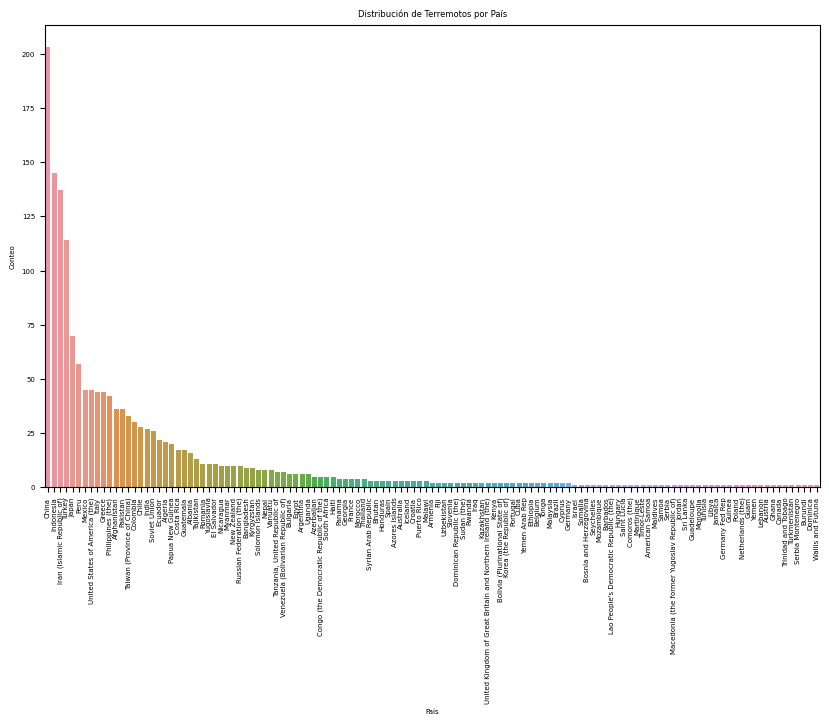

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Distribución de Terremotos por País')
plt.xlabel('País')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()

# Reducir tamaño de fuente
font = {'size': 3}
plt.rc('font', **font)

In [25]:
# Sintetizar la información anterior en top 20 para mejorar visualización
top30_eq_countries = df_eq_geograph['Country'].value_counts().head(30)
top30_eq_countries

China                             203
Indonesia                         145
Iran (Islamic Republic of)        137
Turkey                            114
Japan                              70
Peru                               57
Mexico                             45
United States of America (the)     45
Italy                              44
Greece                             44
Philippines (the)                  42
Afghanistan                        36
Pakistan                           36
Taiwan (Province of China)         33
Colombia                           30
Chile                              28
India                              27
Soviet Union                       26
Ecuador                            22
Algeria                            21
Papua New Guinea                   20
Costa Rica                         17
Guatemala                          17
Albania                            16
Tajikistan                         13
Romania                            11
Yugoslavia  

In [26]:
# Establecer tamaño de fuente a 5
plt.rcParams.update({'font.size': 11})

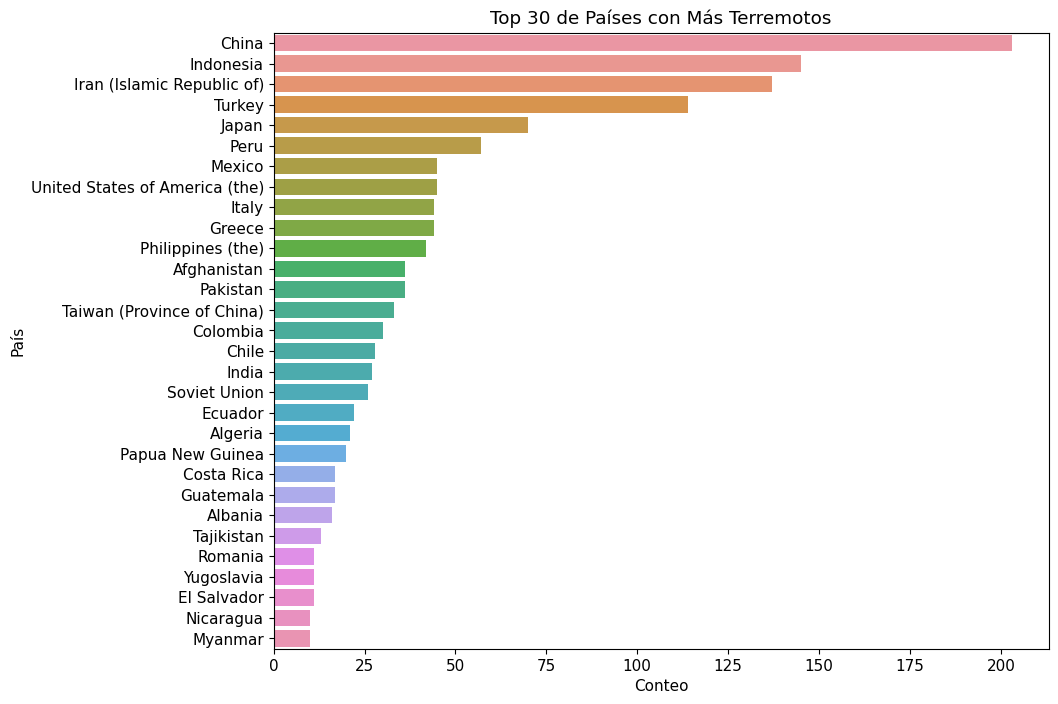

In [27]:
plt.figure(figsize=(10, 8))
sns.barplot(x=top30_eq_countries.values, y=top30_eq_countries.index)
plt.title('Top 30 de Países con Más Terremotos')
plt.xlabel('Conteo')
plt.ylabel('País')
plt.show()

# Aumentar tamaño de fuente
font = {'size': 11}
plt.rc('font', **font)


In [28]:
top10_eq_countries = df_eq_geograph['Country'].value_counts().head(10)
top10_eq_countries

China                             203
Indonesia                         145
Iran (Islamic Republic of)        137
Turkey                            114
Japan                              70
Peru                               57
Mexico                             45
United States of America (the)     45
Italy                              44
Greece                             44
Name: Country, dtype: int64

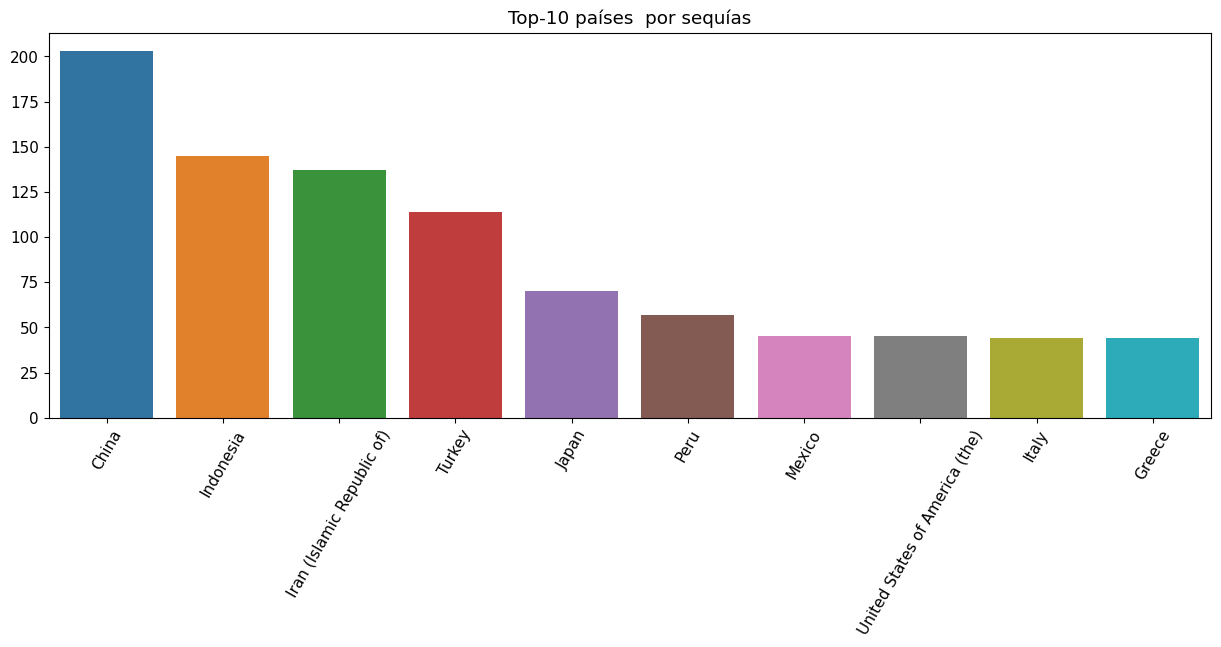

In [29]:
plt.figure(figsize=(15,5))
ax =sns.barplot(y=top10_eq_countries.values, x=top10_eq_countries.index)
plt.title('Top-10 países por terremotos')
plt.xticks(rotation=60)
plt.show()

### Location

In [30]:
df_eq_geograph['Location'].unique()

array(['Quezaltenango, San Marcos', 'Kangra', 'Valparaiso', ...,
       'Sughd province',
       'Defne District (Hatay Province, southern Turkey)',
       'Yesilyurt District (Malatya province)'], dtype=object)

In [31]:
len(df_eq_geograph['Location'])

1597

In [32]:
df_eq_geograph['Location'].isnull()

2        False
9        False
10       False
11       False
15       False
         ...  
16610     True
16611    False
16614    False
16616    False
16617    False
Name: Location, Length: 1597, dtype: bool

In [33]:
top20_eqlocations = df_eq_geograph['Location'].value_counts().head(20)
top20_eqlocations

Yunnan province                                                           14
Sichuan province                                                           8
Managua                                                                    4
Tainan                                                                     3
Yingjiang area (Dehong Dai and Jingpo district, Yunnan Sheng province)     3
Northern                                                                   3
Simeulue district (Nangroe Aceh Darussalam province)                       3
Gansu province                                                             3
Khorasan province                                                          3
Jiayi                                                                      3
Sichuan                                                                    3
Xinjiang Uygur Zizhiqu province                                            3
Jiashi county (Xinjiang)                                                   3

In [34]:
top10_eqlocations = df_eq_geograph['Location'].value_counts().head(10)
top10_eqlocations

Yunnan province                                                           14
Sichuan province                                                           8
Managua                                                                    4
Tainan                                                                     3
Yingjiang area (Dehong Dai and Jingpo district, Yunnan Sheng province)     3
Northern                                                                   3
Simeulue district (Nangroe Aceh Darussalam province)                       3
Gansu province                                                             3
Khorasan province                                                          3
Jiayi                                                                      3
Name: Location, dtype: int64

#### Distribución de terremotos por localidad

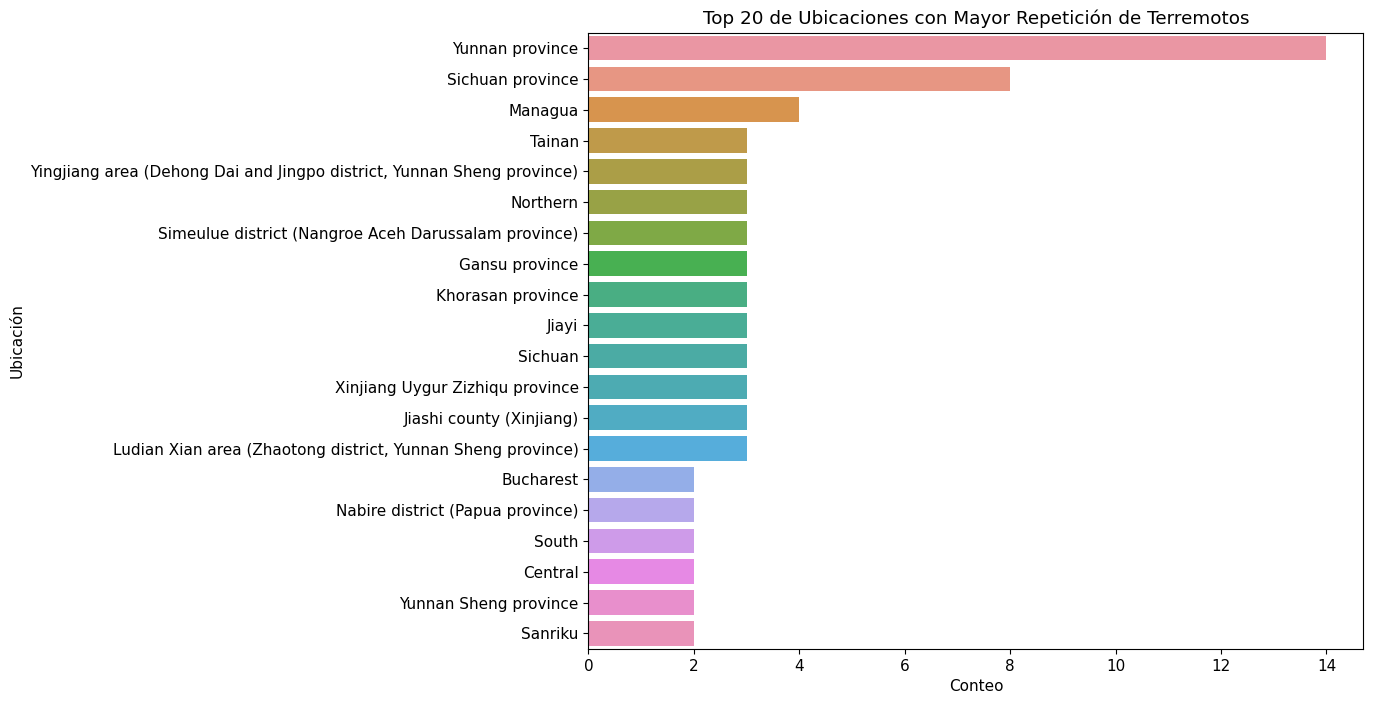

In [35]:
plt.figure(figsize=(10, 8))
sns.countplot(y=df_eq_geograph['Location'], order=df_eq_geograph['Location'].value_counts().head(20).index)
plt.title('Top 20 de Ubicaciones con Mayor Repetición de Terremotos')
plt.xlabel('Conteo')
plt.ylabel('Ubicación')
plt.show()

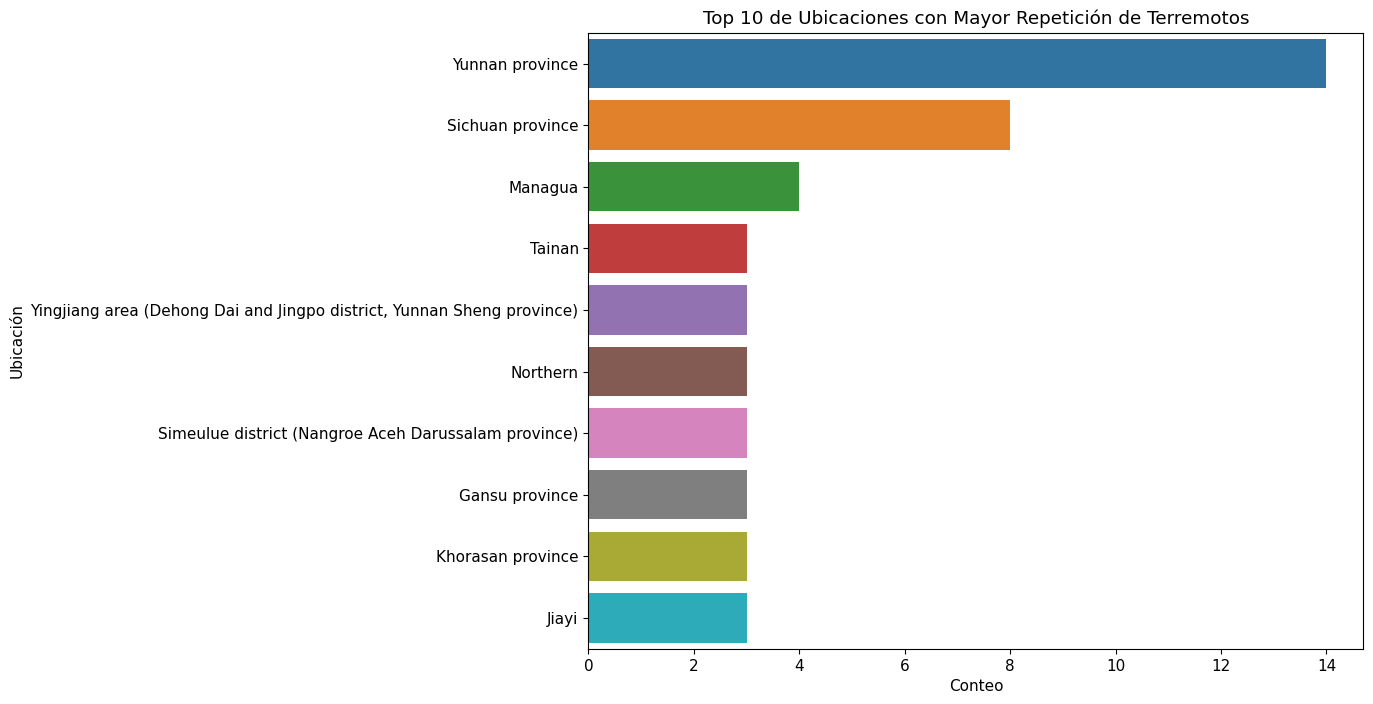

In [36]:
plt.figure(figsize=(10, 8))
sns.countplot(y=df_eq_geograph['Location'], order=df_eq_geograph['Location'].value_counts().head(10).index)
plt.title('Top 10 de Ubicaciones con Mayor Repetición de Terremotos')
plt.xlabel('Conteo')
plt.ylabel('Ubicación')
plt.show()

y=earthquake_geographical_data['Location']: Especifica la variable que se trazará en el eje y. En este caso, queremos mostrar las ubicaciones de los terremotos.

order=earthquake_geographical_data['Location'].value_counts().head(20).index: este parámetro especifica el orden en el que deben aparecer las categorías en el eje y. Usamos el método value_counts() para obtener el recuento de ocurrencias para cada ubicación, luego usamos head(20) para seleccionar las 20 ubicaciones principales y, finalmente, .index se usa para extraer el índice (ubicaciones) de la serie resultante. Esto asegura que las ubicaciones con el conteo más alto se mostrarán en la parte superior de la gráfica.

### Repetición de terremotos por localidades

In [37]:
location_counts = df_eq_geograph['Location'].value_counts()
repeated_eq_locations = location_counts[location_counts > 1]
repeated_eq_locations
top20_repeated_eq_locations = repeated_eq_locations.head(20)
top20_repeated_eq_locations

Yunnan province                                                           14
Sichuan province                                                           8
Managua                                                                    4
Tainan                                                                     3
Yingjiang area (Dehong Dai and Jingpo district, Yunnan Sheng province)     3
Northern                                                                   3
Simeulue district (Nangroe Aceh Darussalam province)                       3
Gansu province                                                             3
Khorasan province                                                          3
Jiayi                                                                      3
Sichuan                                                                    3
Xinjiang Uygur Zizhiqu province                                            3
Jiashi county (Xinjiang)                                                   3

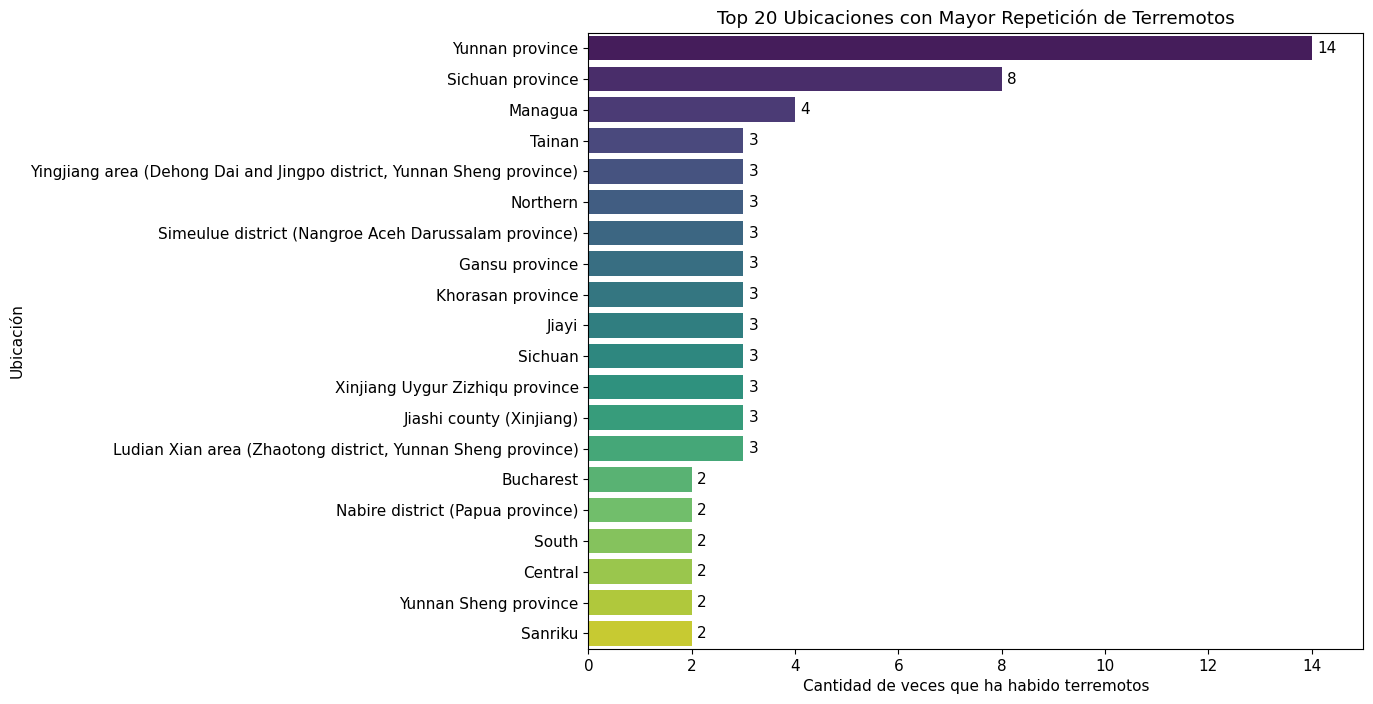

In [38]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=top20_repeated_eq_locations.values, y=top20_repeated_eq_locations.index, palette='viridis')
ax.set_xlim(0, max(top20_repeated_eq_locations.values) + 1)
for i, count in enumerate(top20_repeated_eq_locations.values):
    ax.text(count + 0.1, i, int(count), ha='left', va='center')
plt.title('Top 20 Ubicaciones con Mayor Repetición de Terremotos')
plt.xlabel('Cantidad de veces que ha habido terremotos')
plt.ylabel('Ubicación')
plt.show()

Insights sobre repetición de terremotos en localidades:
1. La localidad donde más terremotos se han repetido es Yunan Province, en 14 ocasiones.
2. Le sigue Sichuan Province, otra localidad también en China, con 8. Sería interesante comprobar si se encuentran en la misma región.
3. Managua en Filipina es la tercera localidad con 4 repeticiones.

# Análisis de desastres asociados, impacto humano y económico de los terremotos
Usando columnas Associated Dis, Total Deaths, Total Affected, Total Damages Adj

In [39]:
df[earthquake_filter].columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

## Desastres Asociados

In [40]:
df_earthquake['Associated Dis'].value_counts()

Slide (land, mud, snow, rock)    162
Tsunami/Tidal wave               152
Fire                              16
Flood                              5
Volcanic activity                  4
Collapse                           2
Avalanche (Snow, Debris)           1
Name: Associated Dis, dtype: int64

In [41]:
df_earthquake['Associated Dis'].isnull().sum()

1255

In [42]:
len(df_earthquake['Associated Dis'])

1597

De los 7 tipos de  desastres asociados que conllevan los terremotos, el porcentaje más alto de los 1597 casos corresponde a 162 deslizamientos (Slide (land, mud, snow, rock)) y el siguiente a tsunamis (152).

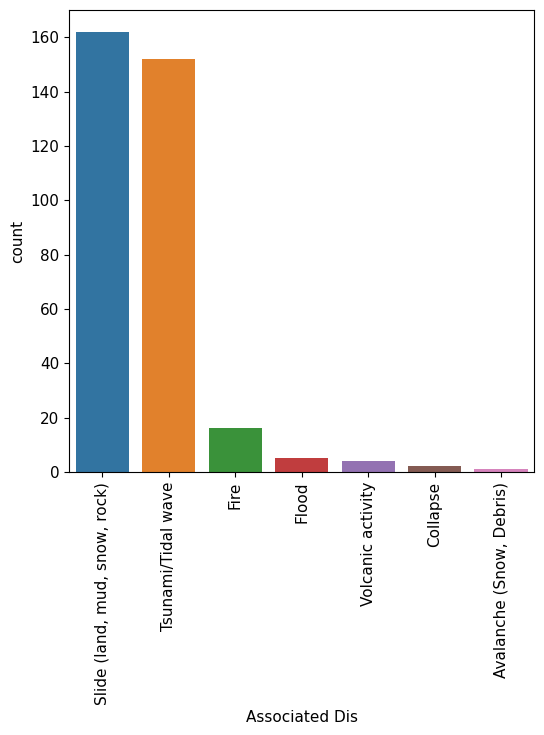

In [43]:
plt.figure(figsize=(6,6))
order = df_earthquake['Associated Dis'].value_counts(ascending=False).index
sns.countplot(data=df_earthquake, x='Associated Dis', order=order)
plt.xticks(rotation=90);

### Distribución anual y por continente de la frecuencia de terremotos

In [44]:
df_earthquake.groupby('Continent')['Start Year'].value_counts()

Continent  Start Year
Africa     2004          8
           1990          5
           1969          4
           1992          3
           2002          3
                        ..
Oceania    2005          1
           2007          1
           2019          1
           2022          1
           2023          1
Name: Start Year, Length: 377, dtype: int64

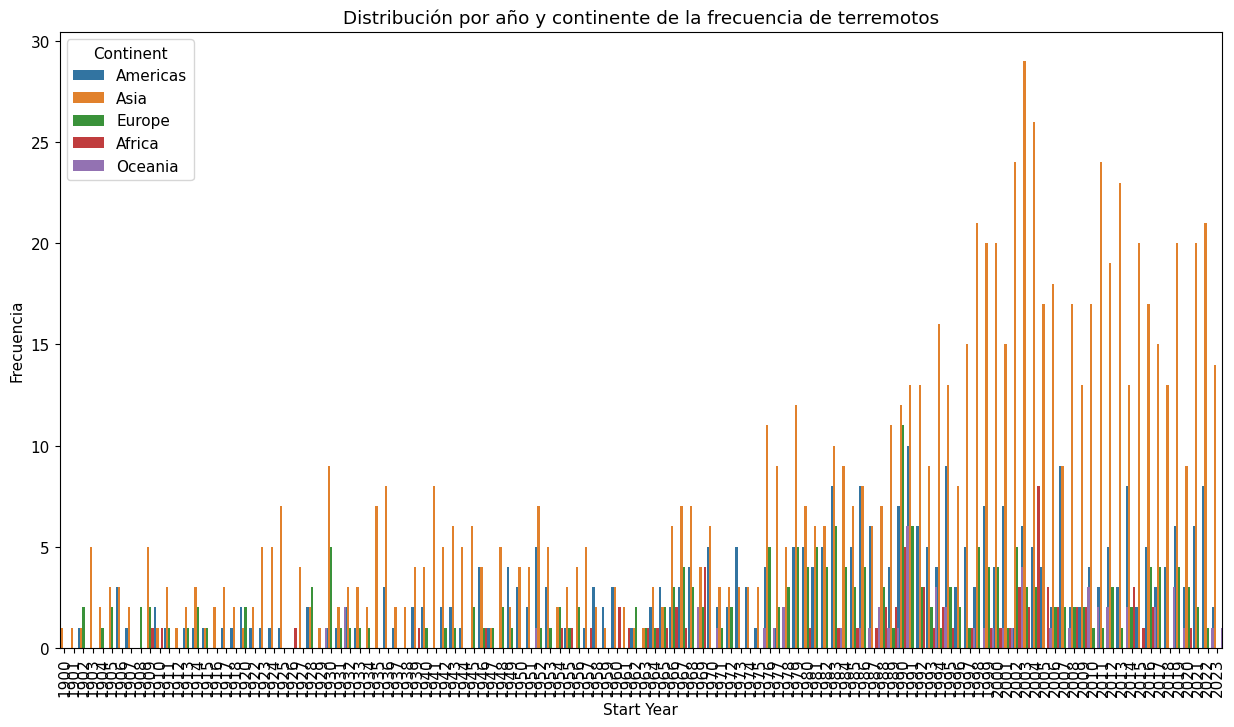

In [45]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_earthquake, x='Start Year', hue='Continent', width=1.2)
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Distribución por año y continente de la frecuencia de terremotos');

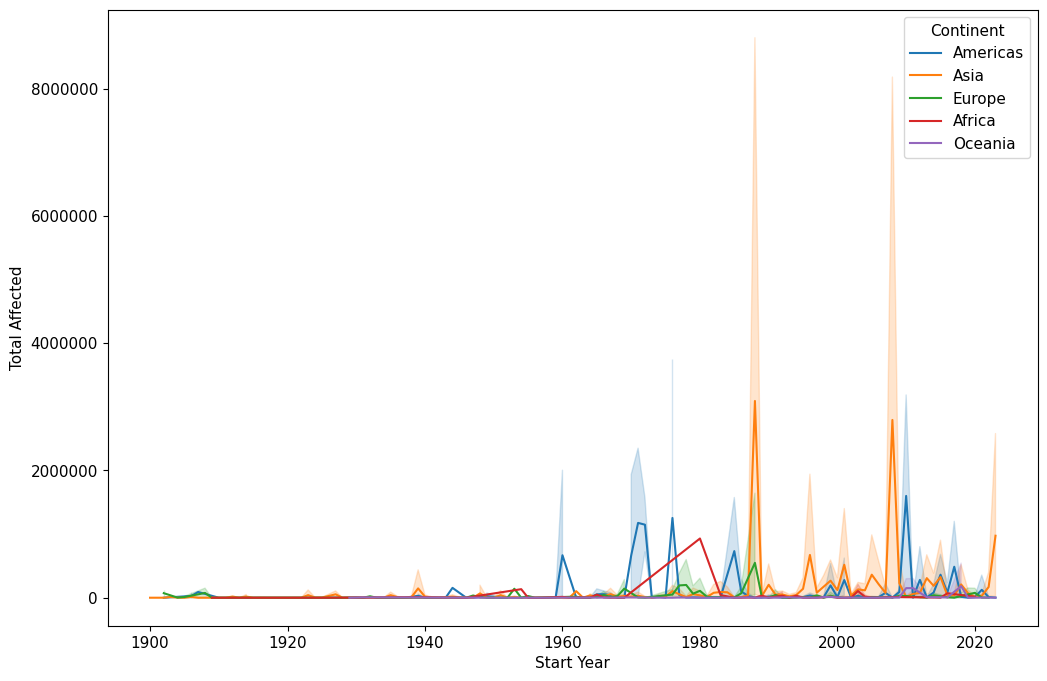

In [46]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_earthquake, x='Start Year', y='Total Affected', hue='Continent')
plt.ticklabel_format(style='plain', axis='y')

## Impacto humano, económico y daños

In [47]:
df_eq_impact = df_earthquake[['Total Deaths', 'Total Affected', 'Total Damages Adj']]
df_eq_impact.head(5)

,Total Deaths,Total Affected,Total Damages Adj
2,2000,0,843726
9,20000,0,812477
10,20000,0,3249907
11,400,0,0
15,12000,0,0


In [48]:
df_eq_impact.isnull().sum()

Total Deaths         0
Total Affected       0
Total Damages Adj    0
dtype: int64

Las columnas de Total de Afectados y Total de Muertes son muy reducidas y la única más completa es las de Total de Daños Ajustado.

#### Total de muertes
Dos millones trescientos noventa y ocho mil quinientos sesenta.

In [49]:
df_eq_impact['Total Deaths'].sum()

2398560

In [50]:
df_eq_impact['Total Deaths'].value_counts()

0       399
1       138
2        95
3        63
4        36
       ... 
922       1
3840      1
167       1
352       1
4500      1
Name: Total Deaths, Length: 313, dtype: int64

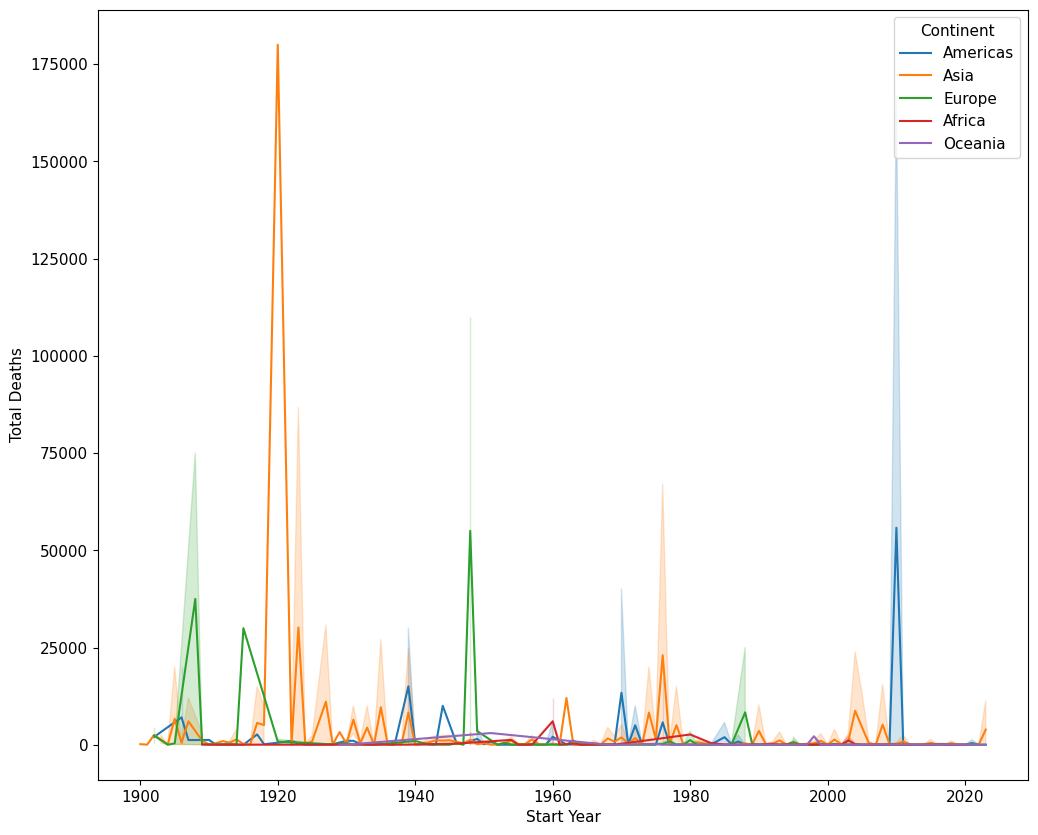

In [51]:
plt.figure(figsize=(12,10))
sns.lineplot(data=df_earthquake, x='Start Year', y='Total Deaths', hue='Continent')
plt.ticklabel_format(style='plain', axis='y')

In [52]:
# Quitar filas con valores NaN en 'Start Year', 'Country', y 'Total Deaths'
df_eq_impact_filtered = df_earthquake.dropna(subset=['Start Year', 'Country', 'Total Deaths'])

# Agrupar los datos filtrados por año y país, y encontrar el conteo máximo de muertes por cada grupo
df_eq_impact_grouped_by_year_country = df_eq_impact_filtered.groupby(['Start Year', 'Country'])['Total Deaths'].agg(['max']).reset_index()

Año con más muertes por país

In [53]:
# Encontrar el país correspondiente para el conteo máximo de muertes en cada año de inicio
max_death_country_by_year = df_eq_impact_grouped_by_year_country.groupby('Start Year').apply(lambda x: x.loc[x['max'].idxmax()])

# Ordenar los resultados por las mayores muertes
max_death_country_by_year = max_death_country_by_year.sort_values(by='max', ascending=False)

# Mostrar los resultados
print("Año con más muertes por país:")
print(max_death_country_by_year[['Start Year', 'Country', 'max']])

Año con más muertes por país:
            Start Year                         Country     max
Start Year                                                    
1976              1976                           China  242000
2010              2010                           Haiti  222570
1920              1920                           China  180000
2004              2004                       Indonesia  165708
1923              1923                           Japan  143000
...                ...                             ...     ...
2019              2019                         Albania      51
1959              1959  United States of America (the)      28
1984              1984                           India      20
1901              1901                           Japan      18
1926              1926                           Egypt      12

[122 rows x 3 columns]


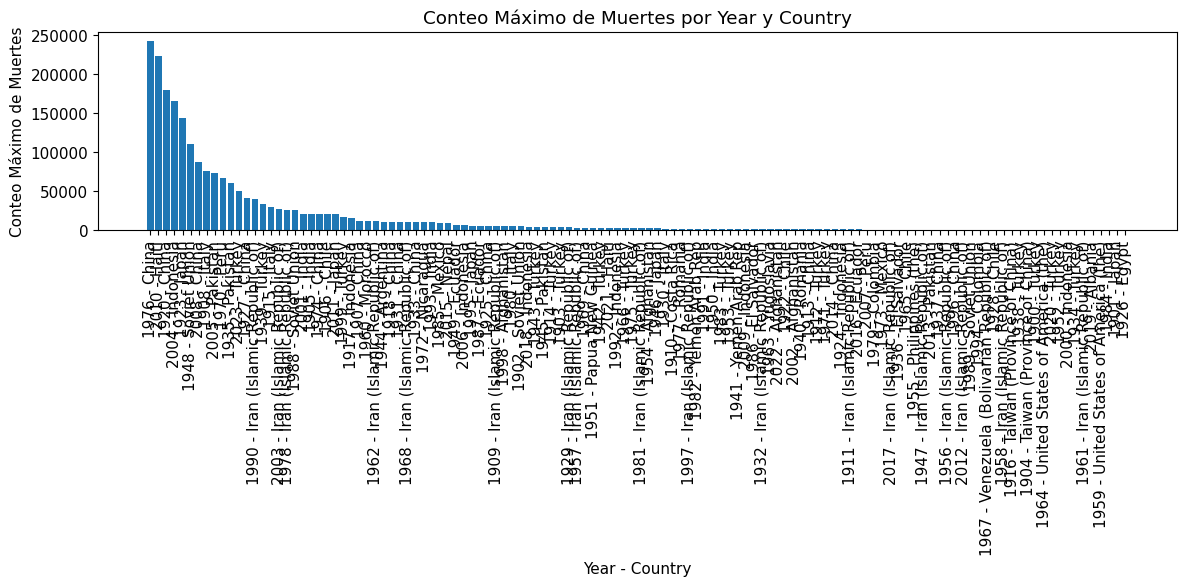

In [54]:
# Ordenar por el máximo conteo de muertes en orden descendente
max_death_country_by_year = max_death_country_by_year.sort_values('max', ascending=False)

# Plot de máximo conteo de muertes por año y país
plt.figure(figsize=(12, 6))
plt.bar(range(len(max_death_country_by_year)), max_death_country_by_year['max'])
plt.xticks(range(len(max_death_country_by_year)), max_death_country_by_year['Start Year'].astype(str) + ' - ' + max_death_country_by_year['Country'], rotation=90)
plt.xlabel('Year - Country')
plt.ylabel('Conteo Máximo de Muertes')
plt.title('Conteo Máximo de Muertes por Year y Country')
plt.tight_layout()

# Show the plot
plt.show()


País con más muertes por año

In [55]:
# Encontrar el año correspondiente para el conteo máximo de muertes en cada país
max_death_year_by_country = df_eq_impact_grouped_by_year_country.groupby('Country').apply(lambda x: x.loc[x['max'].idxmax()])

# Ordenar los resultados por las mayores muertes
max_death_year_by_country = max_death_year_by_country.sort_values(by='max', ascending=False)

# Mostrar los resultados
print("País con más muertes por año:")
print(max_death_year_by_country[['Start Year', 'Country', 'max']])

País con más muertes por año:
                                        Start Year  \
Country                                              
China                                         1976   
Haiti                                         2010   
Indonesia                                     2004   
Japan                                         1923   
Soviet Union                                  1948   
...                                            ...   
Korea (the Republic of)                       2016   
Trinidad and Tobago                           1997   
Hungary                                       2013   
Timor-Leste                                   2015   
Lao People's Democratic Republic (the)        2021   

                                                                       Country  \
Country                                                                          
China                                                                    China   
Haiti                

## Pivot Tables

In [56]:
df_eq_origin_subtype_assdis_pivot = df_earthquake.pivot_table(
    index='Origin',
    columns='Disaster Subtype',
    values=['Latitude', 'Longitude', 'Location', 'Associated Dis'],
    aggfunc='sum',
    fill_value=0
)
df_eq_origin_subtype_assdis_pivot

,Associated Dis,Latitude,Location,Longitude
Disaster Subtype,Tsunami,Tsunami,Tsunami,Tsunami
Origin,,,,
Earthquake,Tsunami/Tidal waveTsunami/Tidal waveTsunami/Ti...,48.60 N0.157-3.20140.537.411.11739.22453.49252...,"Burin Peninsula, NewfoundlandDonggalaParasanga...",58.00 W119.802118.904142.5142.6161.11144.622-1...
Earthquake and landslide,Tsunami/Tidal wave,8.8,Lomblen Island,123.5
Landslide,0,43.70 N,Cote d'Azur,7.25 E
Sub-marine volcano,Tsunami/Tidal wave,-45.243,"Puerto Aisen, Puerto Chacabuco towns (Aisen di...",-72.648
Volacno and landslide,0,8.30 S,Flores sea,121.70 E


## Análisis de Impacto y Relación de la Magnitud del Terremoto

### Distribución de Valores de Magnitud por Origen

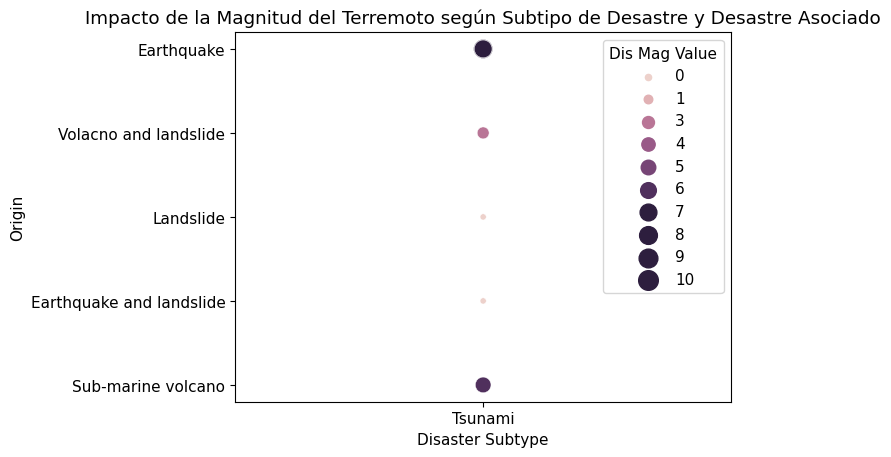

In [87]:
sns.scatterplot(data=df_earthquake, x="Disaster Subtype", y="Origin",
                hue="Dis Mag Value", size="Dis Mag Value", sizes=(20, 200),
                hue_norm=(0, 7), legend="full")

plt.title("Impacto de la Magnitud del Terremoto según Subtipo de Desastre y Desastre Asociado")
plt.xlabel("Disaster Subtype")
plt.ylabel("Origin")
plt.show()

In [61]:
df_earthquake['Associated Dis'].unique()

array(['Tsunami/Tidal wave', nan, 'Slide (land, mud, snow, rock)',
       'Volcanic activity', 'Fire', 'Flood', 'Collapse',
       'Avalanche (Snow, Debris)'], dtype=object)

### Distribución de Valores de Magnitud por Desastre Asociado

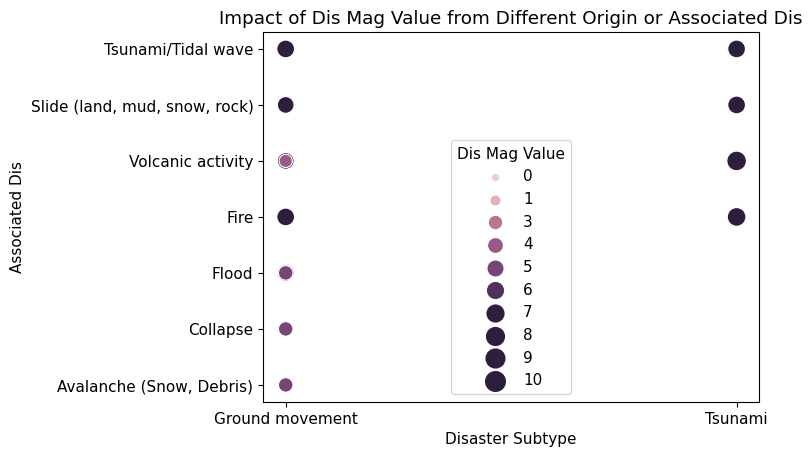

In [77]:
sns.scatterplot(data=df_earthquake, x="Disaster Subtype", y="Associated Dis",
                hue="Dis Mag Value", size="Dis Mag Value", sizes=(20, 200),
                hue_norm=(0, 7), legend="full")

plt.title("Impacto de la Magnitud del Terremoto según Subtipo de Desastre y Desastre Asociado")
plt.xlabel("Disaster Subtype")
plt.ylabel("Associated Dis")
plt.show()


### Relación entre la Magnitud y Variaciones de Terremoto

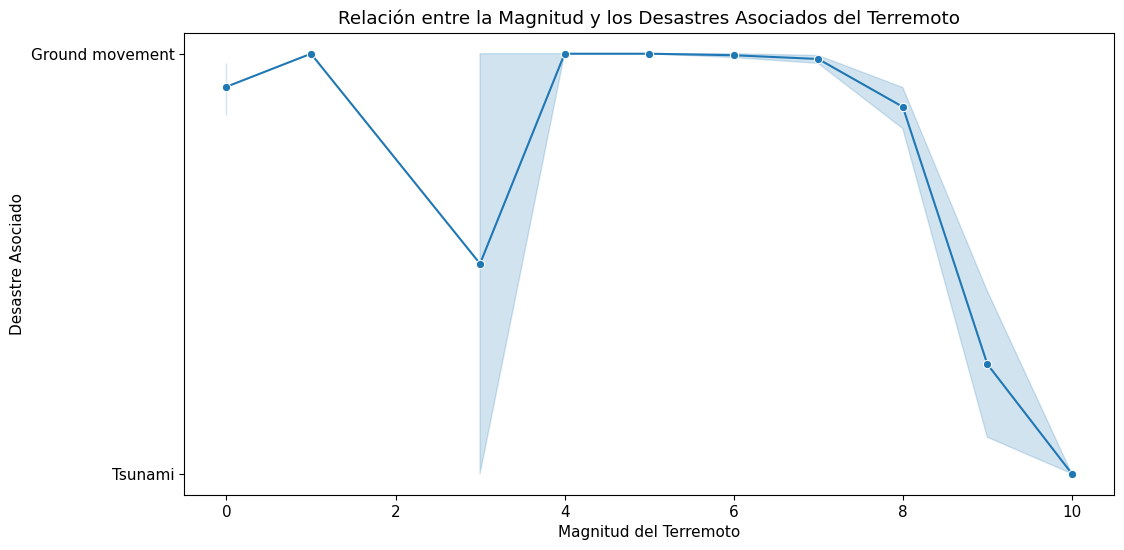

In [85]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_earthquake, x="Dis Mag Value", y="Disaster Subtype", marker="o")
plt.title("Relación entre la Magnitud y los Desastres Asociados del Terremoto")
plt.xlabel("Magnitud del Terremoto")
plt.ylabel("Desastre Asociado")
plt.show()

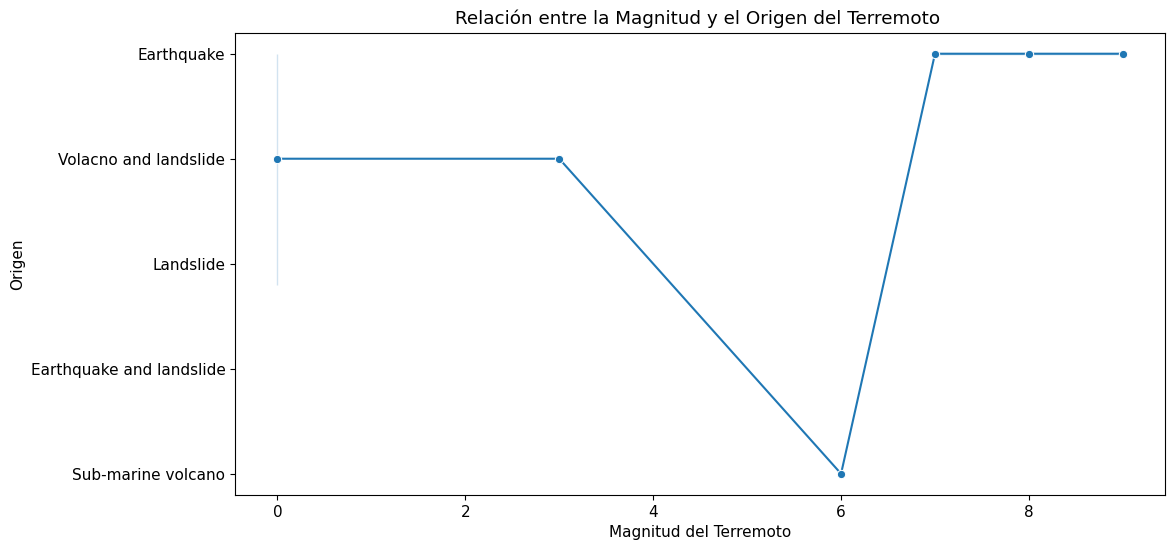

In [84]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_earthquake, x="Dis Mag Value", y="Origin", marker="o")
plt.title("Relación entre la Magnitud y el Origen del Terremoto ")
plt.xlabel("Magnitud del Terremoto")
plt.ylabel("Origen")
plt.show()

Los terremotos que tienen como origen un fenómeno sísmico son los más potentes, a partir de magnitud 7.
Los de origen volcánico submarino también son potentes, con una magnitud de 6.
Los terremotos por erupciones volcánicas y deslizamientos se sitúan en un rango inferior a 4.

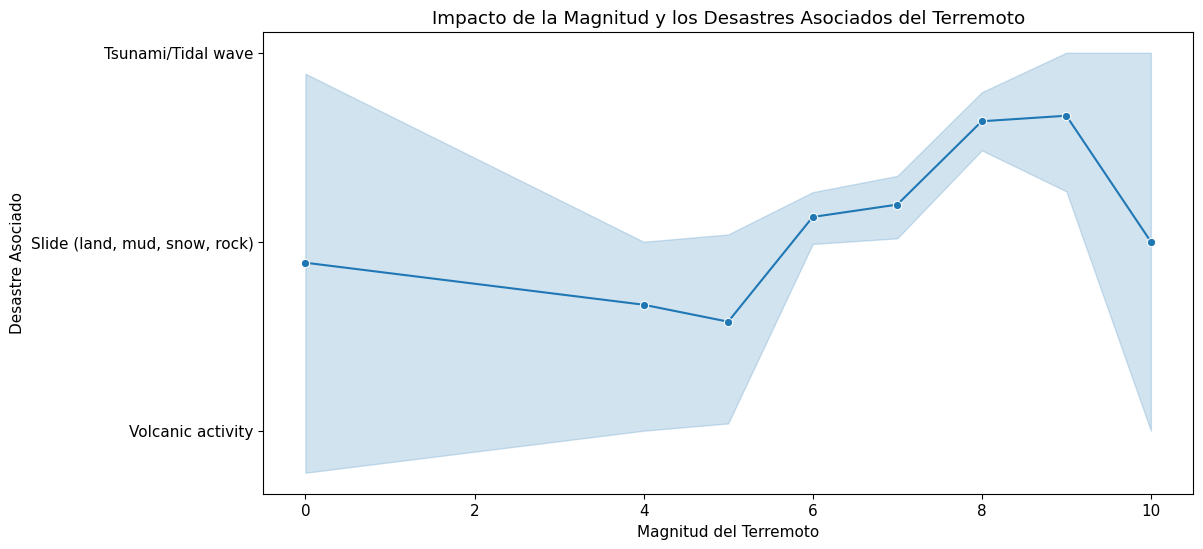

In [82]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_earthquake, x="Dis Mag Value", y="Associated Dis", marker="o")
plt.title("Relación entre la Magnitud y los Desastres Asociados del Terremoto")
plt.xlabel("Magnitud del Terremoto")
plt.ylabel("Desastre Asociado")
plt.show()

## Mapa de terremotos por geolocalización usando Folium

In [ ]:
# Esta línea recupera los datos geográficos relevantes para los terremotos.
# Selecciona las columnas geográficas filtradas usando el indexador loc.
# La llamada reset_index(drop=True) se usa para restablecer el índice del DataFrame resultante y descartar el índice original.
# reset_index garantiza que el índice comience desde 0 y sea continuo sin espacios.
earthquake_geographical_data = df.loc[earthquake_filter, ['Location', 'ISO', 'Country', 'Region', 'Continent']].reset_index(drop=True)

# Esta línea recupera los datos de geolocalización de los terremotos.
# Selecciona las columnas 'Latitude' y 'Longitude' del DataFrame filtrado usando el indexador loc.
# Similar a la línea anterior, la llamada reset_index(drop=True) se usa para restablecer el índice del DataFrame resultante y descartar el índice original.
earthquake_geolocation_data = df.loc[earthquake_filter, ['Latitude', 'Longitude']].reset_index(drop=True)

# !!! Extraer solo 'Location' de la data geográfica daba error:
# aparecían solo nan en las labels de localidad al hacer hover sobre cada marcador.
# earthquake_geographical_data['Location'] = earthquake_geographical_data['Location'].str.extract(r'Location: (.+)')
# Por este motivo mejor se volvieron a llamar las variables geográficas y de geolocalización y se les implementó reset_index.

# Limpiar data de geolocalización:
# Convertir latitude y longitude a numeric, reemplazando valores no numéricos a NaN.
# Parámetro errors='coerce' para manejar valores no numéricos y convertirlos a NaN.
earthquake_geolocation_data['Latitude'] = pd.to_numeric(earthquake_geolocation_data['Latitude'], errors='coerce')
earthquake_geolocation_data['Longitude'] = pd.to_numeric(earthquake_geolocation_data['Longitude'], errors='coerce')

# !!! Convertir latitude y longitude a strings daba error
# earthquake_geolocation_data['Latitude'] = earthquake_geolocation_data['Latitude'].astype(str)
# earthquake_geolocation_data['Longitude'] = earthquake_geolocation_data['Longitude'].astype(str)

# Borrar filas con valores NaN en latitude y longitude:
# Esta línea descarta cualquier fila en el DataFrame de geolocalización que tenga valores NaN en las columnas 'Latitude' o 'Longitude'
# para garantizar que solo se utilicen datos de geolocalización válidos para trazar en el mapa.
earthquake_geolocation_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Crea un mapa Folium
# centrado en los valores medios de latitud y longitud de los datos de geolocalización del terremoto.
center_lat = earthquake_geolocation_data['Latitude'].mean()
center_lon = earthquake_geolocation_data['Longitude'].mean()
map = folium.Map(location=[center_lat, center_lon], zoom_start=3)

# Bucle for itera sobre cada fila en el DF de datos de geolocalización del terremoto.
# Recupera los valores de latitud y longitud para cada ubicación y crea un marcador en el mapa usando la función folium.Marker.
# Parámetro tooltip configurado para mostrar Location al pasar el cursor sobre marcador.
# El parámetro icon personaliza la apariencia del marcador.
for i, row in earthquake_geolocation_data.iterrows():
    location = earthquake_geographical_data.loc[i, 'Location']
    tooltip = folium.Tooltip(location)
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        tooltip=tooltip,
        icon=folium.Icon(color='orange', icon='exclamation', prefix='fa', icon_size=8)
    ).add_to(map)

# !!! El icono no aparece muy bien al llamar a fontawesome icons para personalizar con icono exclamation.
map

Con respecto al uso de reset_index, se usa en este código para garantizar que el índice de los DataFrames resultantes comience desde 0 y sea continuo sin espacios. No es necesario para el funcionamiento del mapa en sí, pero puede ayudar a indexar y hacer referencia a los datos de manera limpia y coherente, evitando errores.

El uso de reset_index no afecta al DataFrame principal (df) en sí. Crea nuevos DataFrames (earthquake_geographical_data y earthquake_geolocation_data) que contienen los datos filtrados y procesados ​​específicos de los terremotos. Estas nuevas variables están separadas del marco de datos principal y contienen la información relacionada con el terremoto extraída de él.

# Conclusiones

# Recomendaciones

# Guardar dataset en csv

In [ ]:
# df.to_csv('../../Data/02ParaLimpiar/02desastres_fillna.csv', index=False, sep=';', encoding='utf-8')

Dataset con valores rellenados y/o filas vacías borradas.